# Task SESI 4 *Introduction Python for Spatial Data*

## 1 Setup & Import Library ⚙️📥
##### 1. pandas  *manipulasi data tabular.*
##### 2. geopandas *membaca dan mengolah data spasial (GeoJSON)*.
##### 3. folium *membuat peta interaktif berbasis leaflet.*
##### 4. matplotlib.pyplot *visualisasi grafik.*
##### 5. seaborn *visualisasi statistik.*
##### 6. numpy *operasi numerik.*
##### 7. shapely.geometry *membuat dan memanipulasi objek geometri polygon/titik*

In [21]:
import pandas as pd 
import geopandas as gpd 
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, Point

## 2 Mengload data GeoJSON 📂📂🔎

In [22]:
dfSpatialFood = gpd.read_file('data_point_pluvial_flood_dataset.geojson')
dfSpatialFood.head()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP,geometry
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High,POINT (3.90944 7.44306)
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High,POINT (3.90861 7.44278)
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High,POINT (3.90889 7.44278)
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High,POINT (3.90917 7.44278)
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High,POINT (3.90944 7.44278)


## 3 Eksplorasi Struktur Data 🔍📋📋

In [23]:
dfSpatialFood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  object  
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), object(1)
memory usage: 12.1+ MB


In [24]:
dfSpatialFood.describe()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall
count,144401.000000,144401.000000,1.441190e+05,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,144401.000000,144401.000000
mean,3.891534,7.374551,-2.502788e+35,-8.342043e+35,-1.673122e+35,-2.120858e+34,-2.120858e+35,219.714542,74.786932
std,0.027887,0.032459,9.225150e+36,1.682769e+37,7.543591e+36,2.686356e+36,8.492619e+36,7.057921,8.891617
min,3.831111,7.311389,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,203.729300,59.541096
25%,3.868889,7.348333,5.105756e+01,-2.592000e+09,1.013099e+02,-8.654586e+00,0.000000e+00,214.286900,68.140822
50%,3.891667,7.374167,6.198023e+01,0.000000e+00,1.894623e+02,-8.006991e+00,1.000000e+00,220.631300,73.873425
75%,3.913611,7.400278,6.916712e+01,2.592000e+09,2.700000e+02,-6.709276e+00,6.000000e+00,224.191400,81.329315
max,3.954444,7.443056,8.657541e+01,3.888000e+10,3.591449e+02,1.168344e+01,4.579360e+05,235.421000,101.515616


## 4️ Visualisasi Distribusi Parameter 🔍📊📊

Total data: 144401
Dipakai untuk plot (setelah bersih): 144013


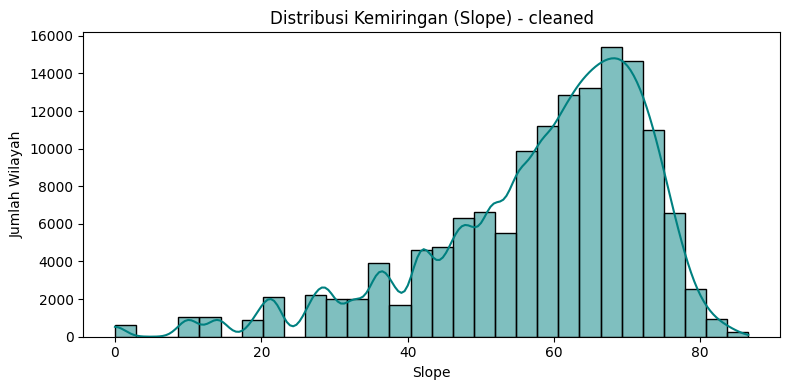

In [ ]:
# Histogram Slope (dibersihkan dari nilai NoData/outlier)
s_raw = pd.to_numeric(dfSpatialFood['Slope'], errors='coerce')

# Buang nilai ekstrem khas NoData raster float32 (sering -3.402823e+38)
s_clean = s_raw.copy()
s_clean[(s_clean.abs() > 1e10)] = np.nan
s_clean = s_clean.dropna()

# Jika slope seharusnya 0–90 derajat, clip supaya outlier kecil tidak mengganggu
s_clean = s_clean.clip(lower=0, upper=90)

print('Total data:', len(s_raw))
print('Dipakai untuk plot (setelah bersih):', len(s_clean))

plt.figure(figsize=(8,4))
sns.histplot(s_clean, bins=30, kde=True, color='teal')
plt.title('Distribusi Kemiringan (Slope) - cleaned')
plt.xlabel('Slope')
plt.ylabel('Jumlah Wilayah')
plt.tight_layout()
plt.show()

In [26]:
# Cek kualitas & sebaran nilai Slope
s = dfSpatialFood['Slope']
print('dtype:', s.dtype)
print('count:', s.shape[0])
print('na:', int(s.isna().sum()))
s_num = pd.to_numeric(s, errors='coerce')
print('na (after to_numeric):', int(s_num.isna().sum()))
finite = np.isfinite(s_num)
print('non-finite (inf/-inf):', int((~finite & ~s_num.isna()).sum()))
s_f = s_num[finite]
print('min/max:', float(s_f.min()), float(s_f.max()))
print('quantiles:', s_f.quantile([0, .01, .05, .5, .95, .99, 1]).to_dict())

# Deteksi nilai ekstrem khas NoData (sering ~ -3.4e38 untuk float32)
extreme_mask = (s_f.abs() > 1e10)
print('extreme(|x|>1e10):', int(extreme_mask.sum()))
if extreme_mask.any():
    print('contoh nilai ekstrem (unique, up to 10):', pd.Series(s_f[extreme_mask].unique()).head(10).tolist())
    print('5 nilai terkecil:', s_f.nsmallest(5).tolist())
    print('5 nilai terbesar:', s_f.nlargest(5).tolist())

dtype: float64
count: 144401
na: 282
na (after to_numeric): 282
non-finite (inf/-inf): 0
min/max: -3.40282306073709e+38 86.5754089355468
quantiles: {0.0: -3.40282306073709e+38, 0.01: 10.0249881744384, 0.05: 27.9383525848388, 0.5: 61.9802322387695, 0.95: 76.1823501586914, 0.99: 80.391011505127, 1.0: 86.5754089355468}
extreme(|x|>1e10): 106
contoh nilai ekstrem (unique, up to 10): [-3.40282306073709e+38]
5 nilai terkecil: [-3.40282306073709e+38, -3.40282306073709e+38, -3.40282306073709e+38, -3.40282306073709e+38, -3.40282306073709e+38]
5 nilai terbesar: [86.5754089355468, 86.5214004516601, 86.4833145141601, 86.3502731323242, 86.223648071289]
